In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import random

2024-09-20 19:17:11.236100: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-20 19:17:11.253137: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-20 19:17:11.258313: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-20 19:17:11.270602: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-20 19:17:12.117225: W tensorflow/compiler/tf2

In [2]:
# Set random seeds for reproducibility
seed_value = 42
random.seed(seed_value)  # Python random seed
np.random.seed(seed_value)  # NumPy random seed
tf.random.set_seed(seed_value)  # TensorFlow random seed

In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [4]:
# import tensorflow as tf

# print(tf.config.list_physical_devices('GPU'))

In [5]:
# gpu_devices = tf.config.experimental.list_physical_devices('GPU')
# for device in gpu_devices:
    # tf.config.experimental.set_memory_growth(device, True)

In [6]:
iris = sns.load_dataset('iris')
print(iris.tail())

     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica


In [7]:
iris.shape

(150, 5)

In [8]:
# Check for missing values
print("Missing values in the dataset:\n", iris.isnull().sum())

Missing values in the dataset:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [9]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(iris['species'])
y_one_hot = to_categorical(y)

In [10]:
list(iris['species'])[50]

'versicolor'

In [11]:
y[50]

1

In [12]:
y_one_hot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [13]:
# Split the data into features and target variable
x = iris.drop('species', axis=1)

x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y_one_hot, test_size=0.3, random_state=42)

In [15]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5


In [16]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [17]:
y_train[0]

array([0., 1., 0.])

In [18]:
y_test[0]

array([0., 1., 0.])

In [19]:
# Feature scaling
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Print out the pre-processed data shapes
print("Training set shape:", x_train_scaled.shape)
print("Testing set shape:", x_test_scaled.shape)

input_dimension = x_train_scaled[1]

Training set shape: (105, 4)
Testing set shape: (45, 4)


In [20]:
# Define the neural network model
model = Sequential()
model.add(Dense(20, input_shape=(4,), activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax')) 

/media/diogo/AC76F99976F9650C/python/enviroments/tensorflow3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-09-20 19:17:12.830994: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-09-20 19:17:12.831017: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:135] retrieving CUDA diagnostic information for host: diogo-G3-3579
2024-09-20 19:17:12.831023: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:142] hostname: diogo-G3-3579
2024-09-20 19:17:12.831136: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:166] libcuda reported version is: 550.107.2
2024-09-20 19:17:12.831157: I external/local_

In [21]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
history = model.fit(x_train_scaled, y_train, 
                    epochs=100, 
                    batch_size=8, 
                    validation_split=0.1, 
                    verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3779 - loss: 1.0483 - val_accuracy: 0.4545 - val_loss: 1.0075
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3779 - loss: 1.0198 - val_accuracy: 0.4545 - val_loss: 0.9869
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3862 - loss: 0.9941 - val_accuracy: 0.4545 - val_loss: 0.9686
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5315 - loss: 0.9707 - val_accuracy: 0.6364 - val_loss: 0.9498
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6351 - loss: 0.9483 - val_accuracy: 0.6364 - val_loss: 0.9292
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6351 - loss: 0.9268 - val_accuracy: 0.6364 - val_loss: 0.9086
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6351 - loss: 0.9058 - val_accuracy: 0.6364 - val_loss: 0.8888
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6351 - loss: 0.8856 - val_accuracy: 0.6364 - 

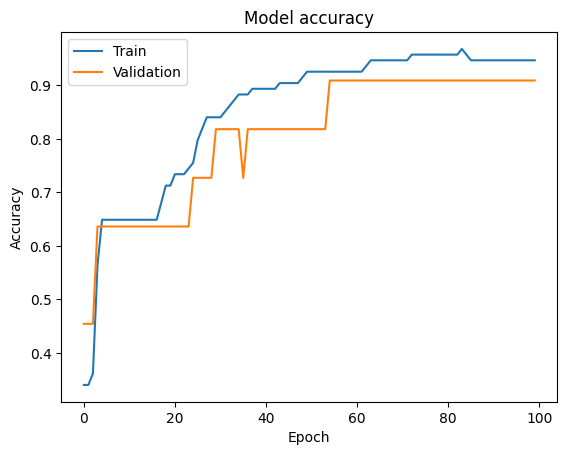

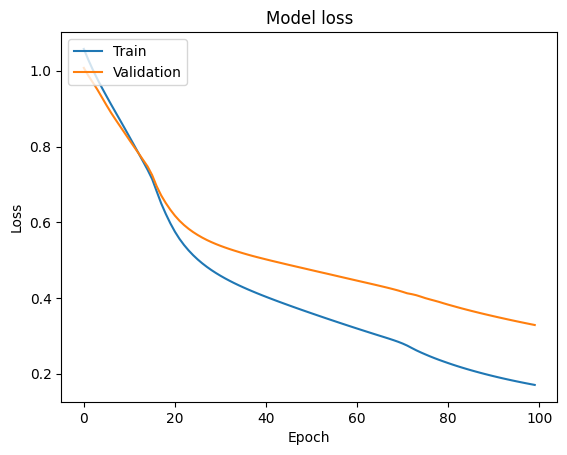

In [23]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')


# Save the plot as an image file
plt.savefig('model_accuracy_3.png', dpi=300)  # You can specify the DPI (dots per inch)

plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Save the plot as an image file
# plt.savefig('model_loss_drop_out_other_2.png', dpi=300)  # You can specify the DPI (dots per inch)
           
plt.show()



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


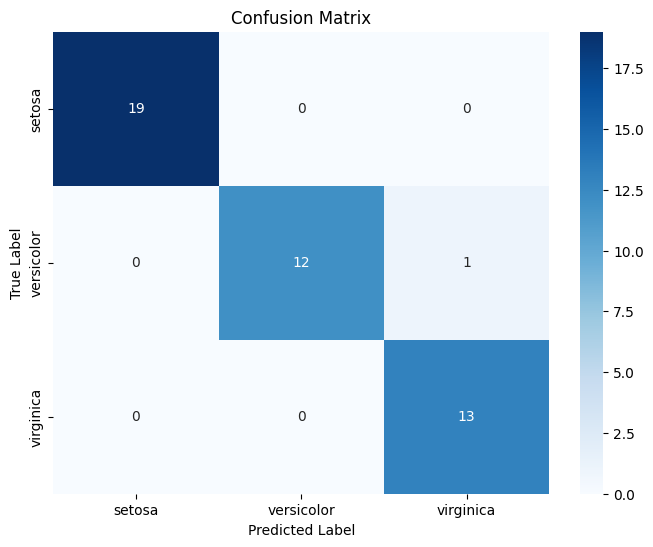

In [24]:
# Make predictions
y_pred = model.predict(x_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true_classes = np.argmax(y_test, axis=1)   # Convert true labels from one-hot encoding to class labels

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [25]:
x_test_scaled[0]

array([0.52941176, 0.36363636, 0.64285714, 0.45833333])

In [26]:
y_test[0]

array([0., 1., 0.])